# MASTER THESIS REPORT
# Twitter Sentimental Analyis

# Introduction
Sentiment analysis of 5000 tweets related to the keyword "bitcoin" is represented in the report.<br>

Analysis Performed:<br>
1)	Word Cloud<br>
2)	Overall Sentiment Scores and Popularity of Tweets and Hashtags<br>
3)	Sentiment Scores by Sentiments Types<br>
4)	Sentiments Scores by Hashtags<br>
5)  Distribution of Followers, Favorites, Retweet and Friends count<br>
6)  Correlation Analysis<br>
7)	Sentiments Score Trend Analysis by Time, Retweets and Favorites count<br>
8)	Predictive Analysis for Senntiments Scores by Retweet and Favorites counts<br>

# Dataset
The dataset was created by compiling data around 5000 tweets which is sent in twitter between 10:30 am and 12:00 pm on 22.Feb.2022. There are 4223 rows after the data cleaning is performed and 14 columns in the dataset. The details about the dataset is described below.

Data fields: The twitter dataset is maintained using JSON which contains several data fields for fetching it for the analysis, in this implementation the below data fields are considered from the main data and appended on this application with custom names. <br>

'tweet': The full text of the tweet from twitter data<br>
'date': The tweet.created_at from twitter data<br>
'author': The user.screen_count from twitter data<br>
'hashtags': The text from twitter JSON data of entities [“entities”] and [“hashtags”]<br>
'followers_count': The user.followers_count from twitter data<br>
'friends_count': The user.friends_count from twitter data<br>
'retweet_count': The retweet_count from twitter data<br>
'favorite_count': The favorite_count from twitter data<br>
'coordinates': Represents the geographic location


# Technologies used
Tools: Jupyter Notebook, Apache Spark, Amazon Comprehend <br>
Programming Language: Python<br>
Libraries:  Tweepy, ipywidgets, tqdm, numpy, pandas, re, nltk, pyspark, emoji, Boto3 SDK, Matplotlib, Plotly, Seaborn

In [1]:
# Data Libraries
import pandas as pd 
import numpy as np

# Visualization Libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
import plotly.express as px
import plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import folium
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
import random

# Date Time - Lib
import time
from datetime import datetime 
from dateutil import parser

#importing color palletes
cnf='#393e46'
dth='#ff2e63'
rec ='#21bf73'
act="#fe9801"

In [2]:
#Directory
tweet_df_path = "../Data/processed_tweet_df_path_with_sentiment.csv"

In [3]:
tweet_df = pd.read_csv(tweet_df_path, index_col=False)

In [4]:
# Checking the structure
#tweet_df.shape

In [5]:
# Adding index number 
tweet_df.index.names = ['Index_number']

In [6]:
#Viewing the results
#tweet_df.sample(5)

In [7]:
#Nan
tweet_df = tweet_df[tweet_df["tweet"].notna()]

# Results:

# 1. Word Cloud

#  Methods and Objectives
Word Cloud library is used for visual representation the text data. Matplotlib is used to plot the graphs. <br> <br> 
Objective: To represent the quick visual of the frequency of words from the tweets and hashtags based on the given input keyword.

### 1.1. Wordcloud of tweets

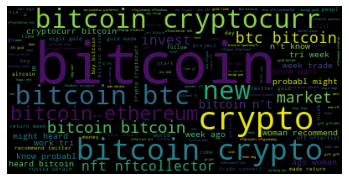

In [8]:
wordcloud = WordCloud().generate(' '.join(tweet_df.tweet))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 1.2. Wordcloud of hashtags

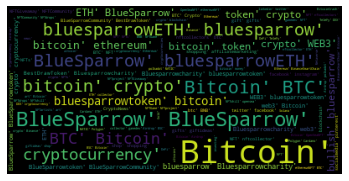

In [9]:
wordcloud = WordCloud().generate(' '.join(tweet_df.hashtags))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Insights
A quick perception is found from the visual which reflects the frequency of the words used in this data. This helps to depict an idea on which topics the users are more interested. 

# 2. Overall Sentiment Scores and Popularity of Tweets and Hashtags

#  Methods and Objectives
Pandas and matplotlib libraries are used in this section. <br>Pandas is used to reshape the datasets and .value_counts function is used to count the number of sentiments, hashtags and tweets.<br>Matplotlib is used to plot the graphs. <br><br>
Objective: To find the overall sentiment scores and analyze the popular tweets and hashtags.

## 2.1. Overall Sentiment Score
The below pie chart displays the overall sentiments scores by percentage <br> 
2.2% - Positive <br> 
3.5% - Negative sentiment <br> 
92.7% - Neutral sentiment is the most popular<br> 
1.7% - Mixed <br> 

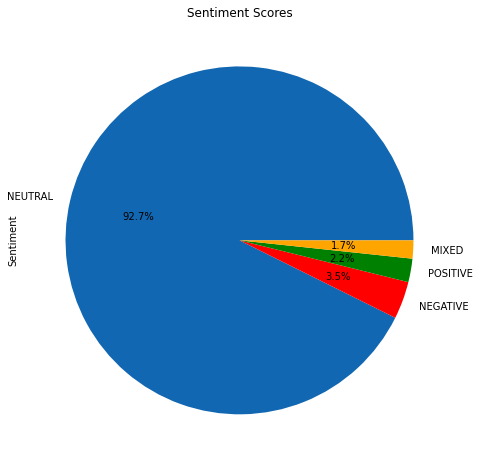

In [10]:
tweet_df['Sentiment'].value_counts().plot(kind='pie',title='Sentiment Scores', autopct ='%1.1f%%',
                                             colors=['#1167b1','red','green','orange'] ,figsize=(14,8))
plt.show()

### Insights
Based on the above chart with the sentiment types and scores, it is predicted that the given input keyword “bitcoin” has a greater number of neutral sentiments comparing other sentiments. This gives us an understanding that the user’s opinion is more unbiased hence the data driven decision related to the bitcoin is not conclusive either in positive or negative. 

## 2.2. Popular Tweets

In [11]:
popular_tweets = tweet_df['tweet'].value_counts(ascending=False)
popular_tweets 

know probabl might heard bitcoin n't know work tri week ago woman recommend twitter guid made return 10500 week trade connect                                                                                97
want see happi end nft nftartist art bitcoin openseanft ethereumnft btc nft nftcollector eth collector gamedev nft nftcollector btc bnb nftgame nftproject nftgiveaway nftcommun nftdrop nftshill opensea    49
bitcoin                                                                                                                                                                                                      44
digit gold bitcoin plummet lt 37k gold risen gt 1900/oz correl digit amp analog gold even neg narr digit gold better way escap pan ukrain                                                                    42
bitcoin ''                                                                                                                                                              

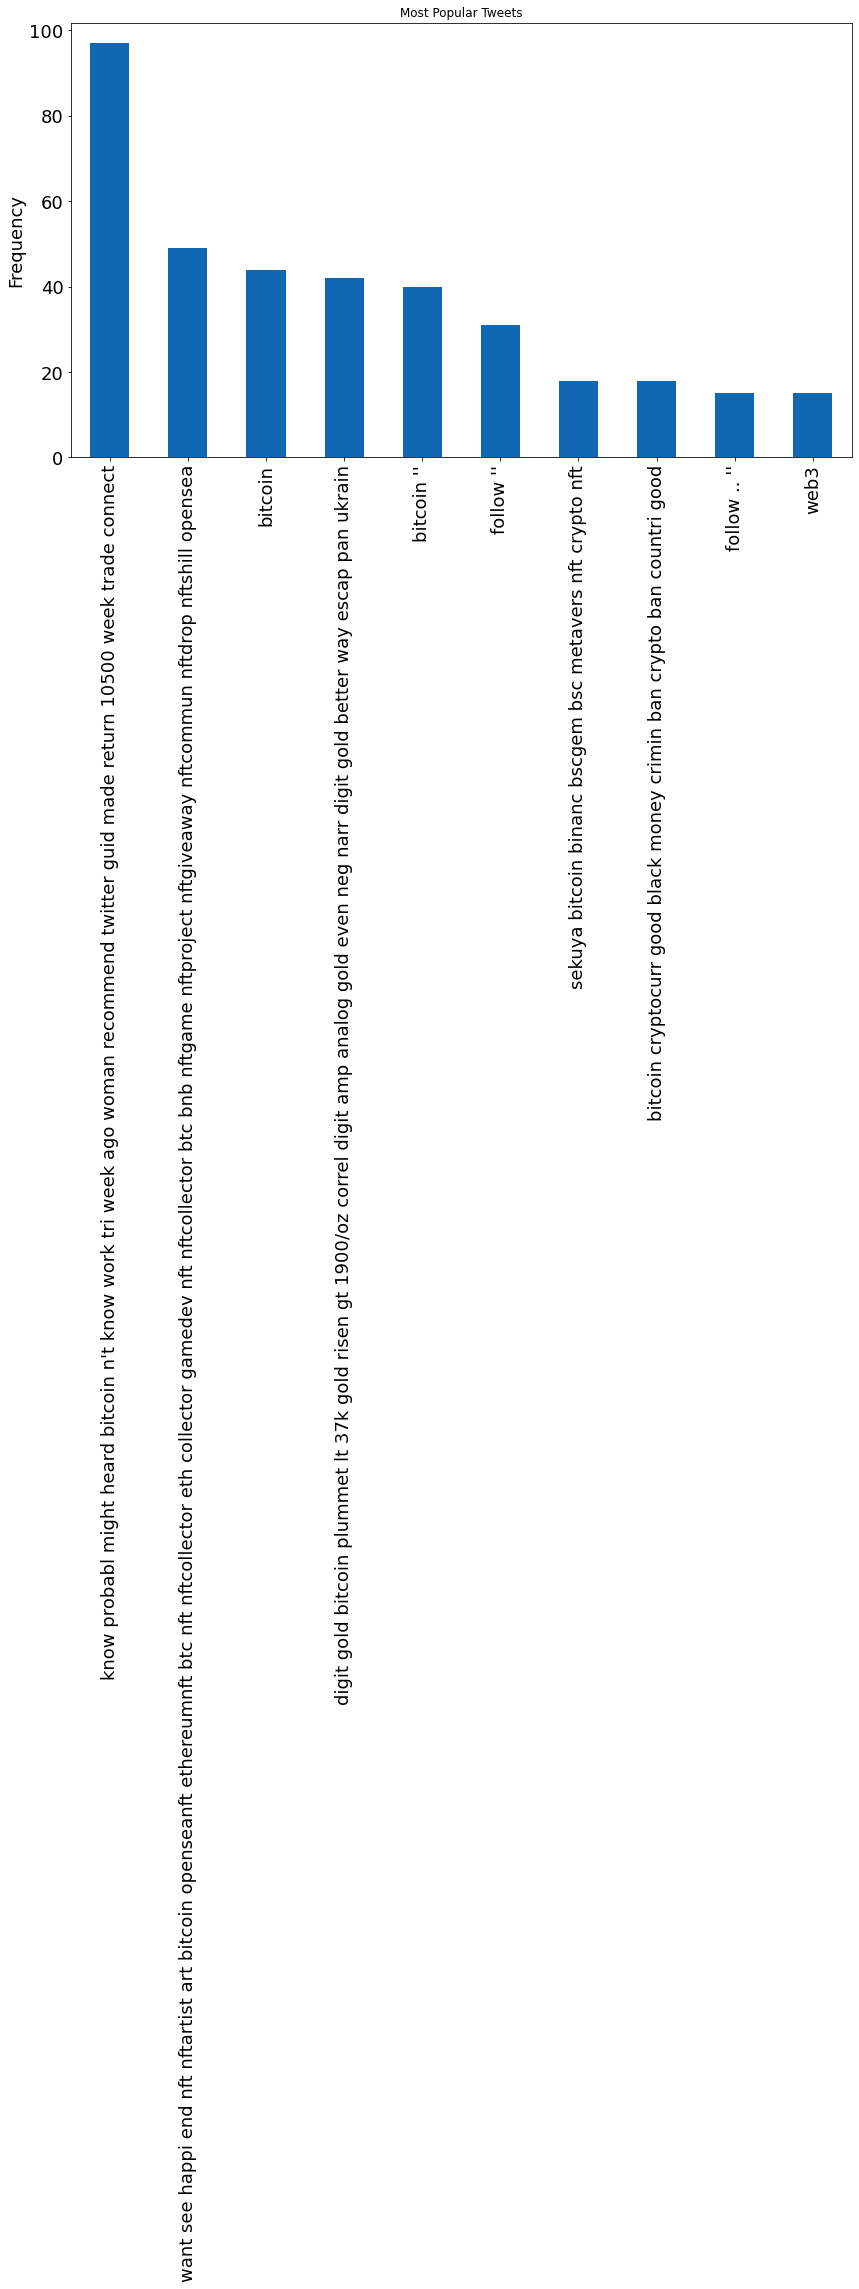

In [12]:
popular_tweets.head(10).plot(kind='bar',title='Most Popular Tweets',figsize=(14,8), color= '#1167b1', fontsize=18)
#plt.xlabel("X axis label")
plt.ylabel("Frequency",  fontsize=18)
plt.show()

## 2.3. Popular Hashtags
The below plot is displaying the top 10 hashtags. "Bitcoin" is the most popular hashtag.

In [13]:
popular_hashtags = tweet_df['hashtags'].value_counts(ascending=False)

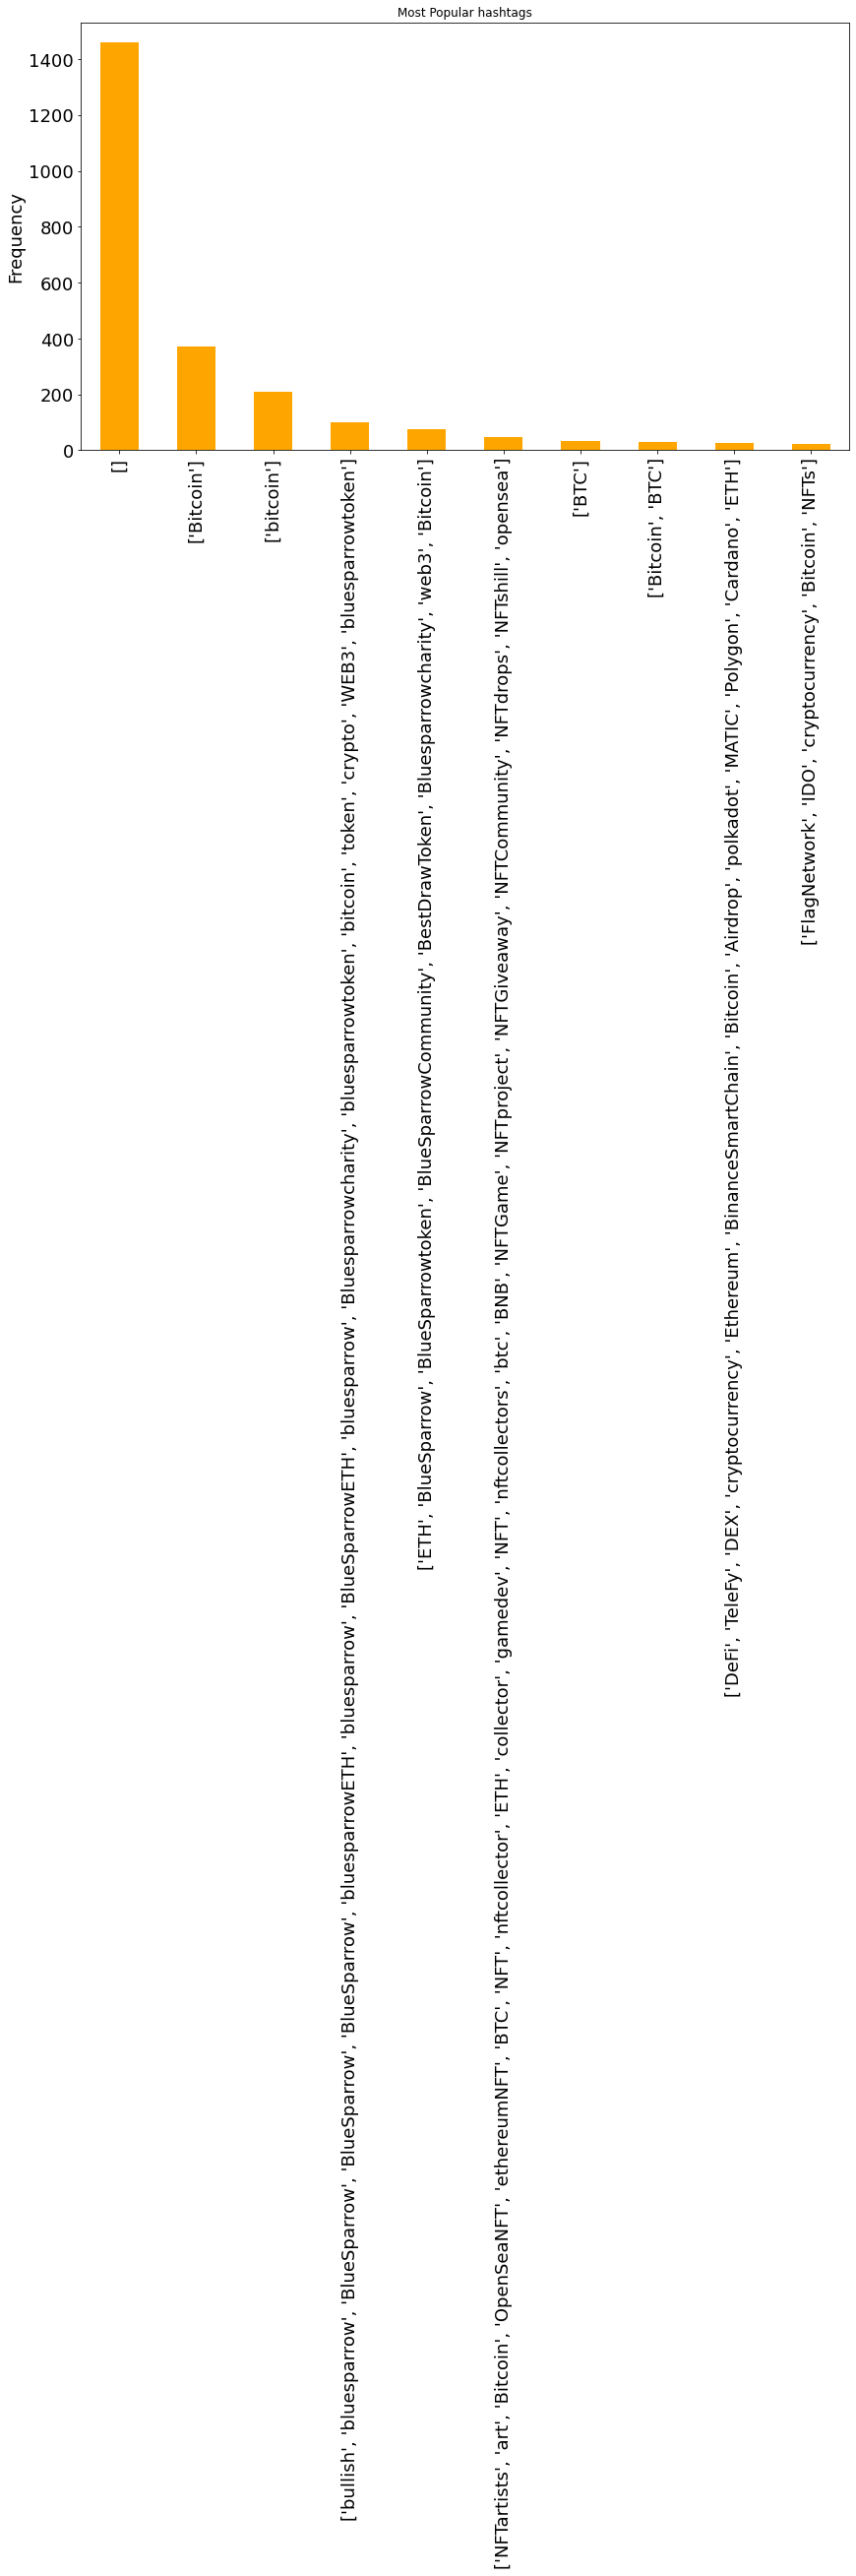

In [14]:
popular_hashtags.head(10).plot(kind='bar',title='Most Popular hashtags',figsize=(14,8), color= 'orange', fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

### Insights
The topmost tweets and hashtags are relevant with the given keyword “bitcoin”. The top 10 tweets show the familiarity of input keyword and its influences. The top 10 hashtags show us the relevant topics related to bitcoin which the users are tweeting.  

# 3. Sentiment Scores by Sentiment Types

# Methods and Objectives
The Pandas and Plotly libraries were used to build this section. <br>The data is moulded with Pandas, and the average sentiment scores for each sentiment are calculated using the.mean() method. <br>Plotly was used to make the bar graph. Sentiment mean value is represented on the X-axis, and sentiment score type is plotted on the y-axis. <br><br>
Objective: To get the impact of each sentiment with its own sentiment types positive, negative, neutral, and mixed. It is visualized by calculating the mean value of each sentiment score with its own types. 

### 3.1. Positive

In [15]:
SentimentScore_Positive = tweet_df.groupby('Sentiment').mean()['SentimentScore_Positive'].reset_index()
SentimentScore_Positive

Sentiment  SentimentScore_Positive
0     MIXED                 0.074293
1  NEGATIVE                 0.016968
2   NEUTRAL                 0.018010
3  POSITIVE                 0.694082

In [16]:
px.bar(SentimentScore_Positive, x='Sentiment', y ='SentimentScore_Positive', color_discrete_sequence=[rec])

### Insights - Positive Sentiment
Positive sentiment score is high for positive sentiment type and low for negative sentiment type. 

### 3.2. Negative

In [17]:
SentimentScore_Negative = tweet_df.groupby('Sentiment').mean()['SentimentScore_Negative'].reset_index()
SentimentScore_Negative

Sentiment  SentimentScore_Negative
0     MIXED                 0.076926
1  NEGATIVE                 0.699517
2   NEUTRAL                 0.030662
3  POSITIVE                 0.033010

In [18]:
px.bar(SentimentScore_Negative, x='Sentiment', y ='SentimentScore_Negative', color_discrete_sequence=[dth])

### Insights - Negative Sentiment
The Negative sentiment score is high for the negative sentiment type and low for neutral sentiment type.

### 3.3. Neutral

In [19]:
SentimentScore_Neutral = tweet_df.groupby('Sentiment').mean()['SentimentScore_Neutral'].reset_index()
SentimentScore_Neutral

Sentiment  SentimentScore_Neutral
0     MIXED                0.216999
1  NEGATIVE                0.239703
2   NEUTRAL                0.938223
3  POSITIVE                0.220765

In [20]:
px.bar(SentimentScore_Neutral, x='Sentiment', y ='SentimentScore_Neutral', color_discrete_sequence=[cnf])

### Insights - Neutral Sentiment:
Neutral sentiment score is high for the neutral sentiment type and low for the mixed sentiment type.

### 3.4. Mixed

In [21]:
SentimentScore_Mixed = tweet_df.groupby('Sentiment').mean()['SentimentScore_Mixed'].reset_index()
SentimentScore_Mixed

Sentiment  SentimentScore_Mixed
0     MIXED              0.631783
1  NEGATIVE              0.043812
2   NEUTRAL              0.013105
3  POSITIVE              0.052143

In [22]:
px.bar(SentimentScore_Mixed, x='Sentiment', y ='SentimentScore_Mixed', color_discrete_sequence=[act])

### Insights - Mixed Sentiment:
The mixed sentiment score is high for the mixed sentiment type and low for neutral sentiment type.

# 4. Sentiments score by Hashtags
Objective: To find how the hashtags impacts the sentiment scores and to depict about the topic from the data.

### 4.1. Positive Sentiment with Top 100 Hashtags

In [23]:
hashtags_scorepositive = tweet_df.groupby('hashtags').mean()['SentimentScore_Positive'].reset_index()
hashtags_scorepositive

hashtags  \
0                                    ['39K', 'Bitcoin']   
1           ['ADA', 'BUSD', 'Stablecoin', 'BearMarket']   
2                                    ['ADA', 'Bitcoin']   
3                                    ['ADA', 'bitcoin']   
4     ['AI', 'NFTs', 'Metaverse', 'metaverse', 'web3...   
...                                                 ...   
1276  ['yieldfields', 'yieldfarming', 'crypto', 'bit...   
1277                                        ['youtube']   
1278  ['youtubeshort', 'ETH', 'Ethereum', 'Bitcoin',...   
1279  ['zenotrading', 'forex', 'bitcoin', 'zenomarke...   
1280                                                 []   

      SentimentScore_Positive  
0                    0.376727  
1                    0.005403  
2                    0.015105  
3                    0.007699  
4                    0.000389  
...                       ...  
1276                 0.000258  
1277                 0.001780  
1278                 0.009844  
1279                 0.000280  
1280                 0.043467  

[1281 rows x 2 columns]

In [24]:
top100_bypositivescore =hashtags_scorepositive.sort_values('SentimentScore_Positive',ascending=0).head(100)
top100_bypositivescore

hashtags  \
1146                                   ['love', 'tech']   
726   ['TippingTuesday', 'doge', 'dogecoin', 'shib',...   
1229          ['seamlessswapdefi', 'bitcoin', 'Crypto']   
510   ['FlagNetwork', 'IDO', 'cryptocurrency', 'Bitc...   
1150                                          ['manic']   
...                                                 ...   
949                        ['crypto', 'Bitcoin', 'BTC']   
5                               ['ALTCOINS', 'BITCOIN']   
32                             ['AnjiEco', 'AnjiToken']   
720   ['Thailand', 'Burma', 'Myanmar', 'Laos', 'Mala...   
732                      ['Twosday', 'Bitcoin', 'Alts']   

      SentimentScore_Positive  
1146                 0.964151  
726                  0.927233  
1229                 0.924746  
510                  0.918179  
1150                 0.807664  
...                       ...  
949                  0.050383  
5                    0.049984  
32                   0.047844  
720                  0.047652  
732                  0.047173  

[100 rows x 2 columns]

### 4.2. Negative Sentiments with Top 100 Hashtags

In [25]:
hashtags_scorenegative = tweet_df.groupby('hashtags').mean()['SentimentScore_Negative'].reset_index()
hashtags_scorenegative

hashtags  \
0                                    ['39K', 'Bitcoin']   
1           ['ADA', 'BUSD', 'Stablecoin', 'BearMarket']   
2                                    ['ADA', 'Bitcoin']   
3                                    ['ADA', 'bitcoin']   
4     ['AI', 'NFTs', 'Metaverse', 'metaverse', 'web3...   
...                                                 ...   
1276  ['yieldfields', 'yieldfarming', 'crypto', 'bit...   
1277                                        ['youtube']   
1278  ['youtubeshort', 'ETH', 'Ethereum', 'Bitcoin',...   
1279  ['zenotrading', 'forex', 'bitcoin', 'zenomarke...   
1280                                                 []   

      SentimentScore_Negative  
0                    0.006800  
1                    0.037786  
2                    0.008253  
3                    0.021263  
4                    0.000688  
...                       ...  
1276                 0.000190  
1277                 0.016264  
1278                 0.007162  
1279                 0.000118  
1280                 0.080772  

[1281 rows x 2 columns]

In [26]:
top100_bynegativescore = hashtags_scorenegative.sort_values('SentimentScore_Negative',ascending=0).head(100)
top100_bynegativescore

hashtags  \
349          ['CRYPTO', 'BTC', 'BITCOIN', 'FUCK_PUTIN']   
217                               ['Bitcoin', 'Monero']   
99                               ['Binance', 'bitcoin']   
1173          ['newbie', 'Crypto', 'Trader', 'bitcoin']   
542                                           ['HYPRR']   
...                                                 ...   
800                         ['bitcoin', 'MetaverseNFT']   
815                              ['bitcoin', 'bitcoin']   
928   ['buythedip', 'Bitcoin', 'BitcoinCrash', 'Cryp...   
770                   ['altcoins', 'bitcoin', 'bitdao']   
682          ['Russia', 'Ukraine', 'crypto', 'Bitcoin']   

      SentimentScore_Negative  
349                  0.980393  
217                  0.917629  
99                   0.896226  
1173                 0.864263  
542                  0.802966  
...                       ...  
800                  0.074230  
815                  0.073893  
928                  0.073548  
770                  0.073182  
682                  0.071999  

[100 rows x 2 columns]

### 4.3. Neutral Sentiment with Top 100 Hashtags

In [27]:
hashtags_scoreneutral = tweet_df.groupby('hashtags').mean()['SentimentScore_Neutral'].reset_index()
hashtags_scoreneutral

hashtags  \
0                                    ['39K', 'Bitcoin']   
1           ['ADA', 'BUSD', 'Stablecoin', 'BearMarket']   
2                                    ['ADA', 'Bitcoin']   
3                                    ['ADA', 'bitcoin']   
4     ['AI', 'NFTs', 'Metaverse', 'metaverse', 'web3...   
...                                                 ...   
1276  ['yieldfields', 'yieldfarming', 'crypto', 'bit...   
1277                                        ['youtube']   
1278  ['youtubeshort', 'ETH', 'Ethereum', 'Bitcoin',...   
1279  ['zenotrading', 'forex', 'bitcoin', 'zenomarke...   
1280                                                 []   

      SentimentScore_Neutral  
0                   0.614766  
1                   0.952853  
2                   0.974812  
3                   0.961021  
4                   0.998916  
...                      ...  
1276                0.999534  
1277                0.981515  
1278                0.981003  
1279                0.999585  
1280                0.834241  

[1281 rows x 2 columns]

In [28]:
top100_byneutralscore =hashtags_scoreneutral.sort_values('SentimentScore_Neutral',ascending=0).head(100)
top100_byneutralscore

hashtags  \
1260  ['tradewithcasper', 'crypto', 'bitcoin', 'ethe...   
763   ['affiliatemarketing', 'affiliate', 'socialmed...   
833              ['bitcoin', 'coin', 'nft', 'etherium']   
619   ['NFT', 'NFTs', 'NFTCommmunity', 'NFTCollectio...   
513   ['Forex', 'Crypto', 'USDJPY', 'USDX', 'Gold', ...   
...                                                 ...   
391   ['Crypto', 'cryptocurrency', 'CryptoMining', '...   
959   ['crypto', 'bitcoin', 'cryptocurrency', 'block...   
207   ['Bitcoin', 'HJPatel', 'coding', '100DaysOfCod...   
87    ['BTCUSDT', 'BTC', 'USDT', 'Bitcoin', 'Binance...   
368     ['Crypto', 'Bitcoin', 'Ethereum', 'Blockchain']   

      SentimentScore_Neutral  
1260                0.999610  
763                 0.999603  
833                 0.999600  
619                 0.999599  
513                 0.999597  
...                      ...  
391                 0.999342  
959                 0.999341  
207                 0.999340  
87                  0.999340  
368                 0.999335  

[100 rows x 2 columns]

### 4.4. Mixed Sentiment with Top 100 Hashtags

In [29]:
hashtags_scoremixed = tweet_df.groupby('hashtags').mean()['SentimentScore_Mixed'].reset_index()
hashtags_scoremixed

hashtags  SentimentScore_Mixed
0                                    ['39K', 'Bitcoin']              0.001707
1           ['ADA', 'BUSD', 'Stablecoin', 'BearMarket']              0.003958
2                                    ['ADA', 'Bitcoin']              0.001830
3                                    ['ADA', 'bitcoin']              0.010017
4     ['AI', 'NFTs', 'Metaverse', 'metaverse', 'web3...              0.000006
...                                                 ...                   ...
1276  ['yieldfields', 'yieldfarming', 'crypto', 'bit...              0.000017
1277                                        ['youtube']              0.000442
1278  ['youtubeshort', 'ETH', 'Ethereum', 'Bitcoin',...              0.001991
1279  ['zenotrading', 'forex', 'bitcoin', 'zenomarke...              0.000017
1280                                                 []              0.041519

[1281 rows x 2 columns]

In [30]:
top100_bymixedscore =hashtags_scoremixed.sort_values('SentimentScore_Mixed',ascending=0).head(100)
top100_bymixedscore

hashtags  SentimentScore_Mixed
455                  ['Defi', 'Bitcoin', 'Luna', 'UST']              0.908490
868         ['bitcoin', 'thebitcoinstandard', 'crypto']              0.853191
1014              ['cryptocurrency', 'FOMO', 'bitcoin']              0.835652
874   ['bitcoiners', 'bitcoin', 'forthekids', 'alpha...              0.783056
856                                 ['bitcoin', 'fomo']              0.693800
...                                                 ...                   ...
429   ['CryptocurrencyNews', 'cryptocurrency', 'Cryp...              0.026387
1069                    ['fall', 'Bitcoin', 'Ethereum']              0.026307
810                                 ['bitcoin', 'bike']              0.025901
61                         ['BTC', 'Bitcoin', 'Crypto']              0.025721
730                              ['Trudeau', 'Bitcoin']              0.025716

[100 rows x 2 columns]

The bar plots displays the top 100 hashtags by average sentiment scores. <br>The bar plots are plotted by taking hashtags at x-axis and Sentiment scores at y-axis.

In [31]:
fig_c = px.bar(top100_bypositivescore, x='hashtags', y ='SentimentScore_Positive', color_discrete_sequence=[rec])
fig_d = px.bar(top100_bynegativescore, x='hashtags', y ='SentimentScore_Negative', color_discrete_sequence=[dth])

fig = make_subplots(rows =1,cols =2, shared_xaxes=False, horizontal_spacing=0.1,
                   subplot_titles=('Highest SentimentScore_Positive by hashtags','Highest SentimentScore_Negative by hashtags'))

fig.add_trace(fig_c['data'][0],row= 1, col= 1)
fig.add_trace(fig_d['data'][0],row= 1, col= 2)

fig.update_layout(height=480, width=1000)
#fig.update_layout(height=480, width=1000)
fig.show()

In [32]:
fig_e = px.bar(top100_byneutralscore, x='hashtags', y ='SentimentScore_Neutral', color_discrete_sequence=[cnf])
fig_f = px.bar(top100_bymixedscore, x='hashtags', y ='SentimentScore_Mixed', color_discrete_sequence=[act])

fig = make_subplots(rows =1,cols =2, shared_xaxes=False, horizontal_spacing=0.1,
                   subplot_titles=('Highest SentimentScore_Neutral by hashtags','Highest SentimentScore_Mixed by hashtags'))

fig.add_trace(fig_e['data'][0],row= 1, col= 1)
fig.add_trace(fig_f['data'][0],row= 1, col= 2)

fig.update_layout(height=500, width=1000)
fig.show()

### Insights
The above charts helped to identify the top 100 frequently used hashtags with all types of sentiment based on the keyword “bitcoin”, also it shows the entities or topics posted related to the data.

# 5. Distribution of Followers, Favorites, Retweet and Friends count

# Methods and Objectives
The pandas value counts function is used to count the number of followers, and then the data is plotted using the Matplotlib library. <br> 

Objective: To find the frequency distribution of the tweets with respect to followers, favourites, retweet, and friends count. 

### 5.1. followers_count Insights:
The number of followers is normally distributed between 0 to 20 with high frequency, and it is distributed between 20 to 120 with a relatively very less or no frequency.

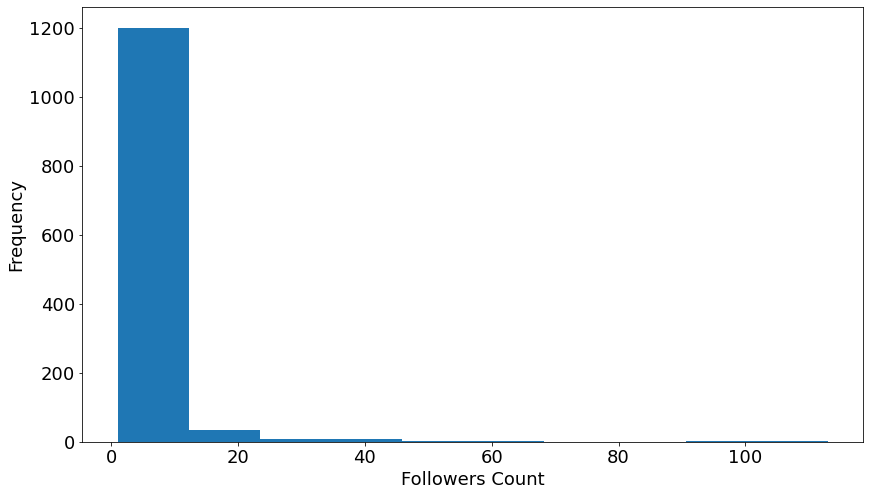

In [33]:
tweet_df['followers_count'].value_counts().plot(kind='hist',figsize=(14,8), fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xlabel("Followers Count", fontsize=18)
plt.show()
#title='Followers Counts Distribution'

### 5.2. favorite_count Insights:
The number of favourites count with the highest frequency are distributed between 0 to 250. Between 250 to 500 there is very low frequency. Then from 750 to 2500 there is no frequency and after 2500 there is very low frequency.

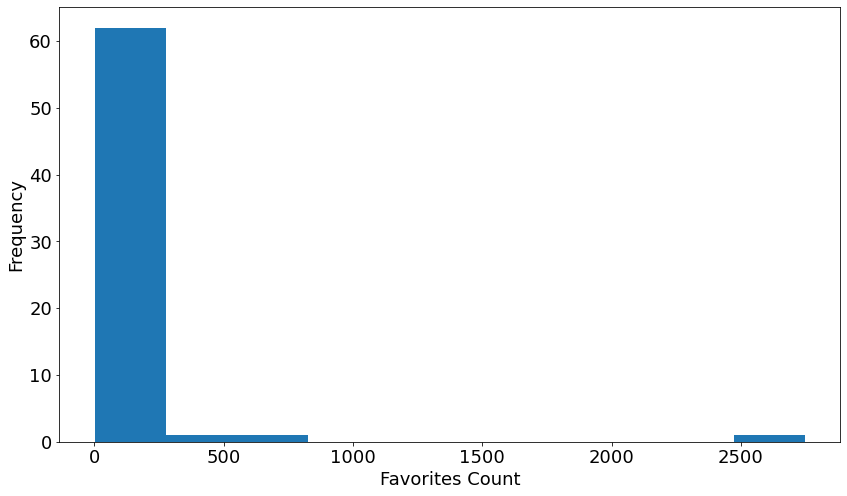

In [34]:
tweet_df['favorite_count'].value_counts().plot(kind='hist',figsize=(14,8), fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xlabel("Favorites Count", fontsize=18)
plt.show()
#title='Favorites Count Distribution'

### 5.3. retweet_count Insights:
The number of retweets count with the highest frequency are distributed between 0 to 500, almost no frequency between 700 to 3250, and a very low frequency between 3250 to 3700.

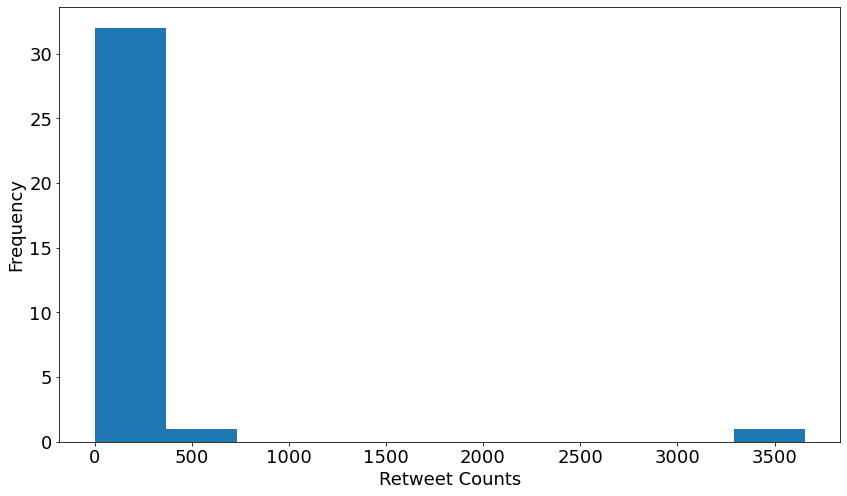

In [35]:
tweet_df['retweet_count'].value_counts().plot(kind='hist',figsize=(14,8), fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xlabel("Retweet Counts", fontsize=18)
plt.show()
#title='Retweet Count Distribution'

### 5.4. friends_count Insights:
The number of friends count is normally distributed between 0 to 20 with high frequency, and between 20 to 120 with a relatively low frequency or no frequency.

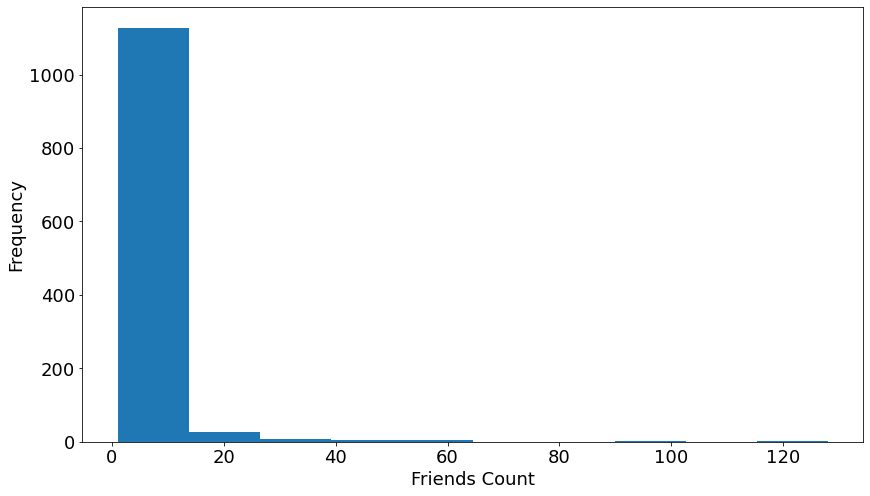

In [36]:
tweet_df['friends_count'].value_counts().plot(kind='hist',figsize=(14,8), fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xlabel("Friends Count", fontsize=18)
plt.show()
#title='Friends Count Distribution'

### Insights
The major frequency distribution based on the followers and friends count lies between 0 to 20. The major frequency distribution based on the retweets and favourites count lies between 0 to 500. The frequency of the users are high for less  followers and friends count users. It seems, the frequency is resulting high when counts are less. 

# 6. Correlation Analysis
Correlation is a method for determining the relationships between two variables. <br><br>A correlation coefficient that is near to 0, but either positive or negative, indicates that the two variables have less or no relationship.<br> <br>A correlation coefficient near to 1 indicates that there is a positive relationship between the two variables, with increases in one variable causing increases in the other. <br><br>A correlation coefficient near to -1 suggests that there is a negative relationship between two variables.<br>

# Method and objectives

Matplotlib library is used to create the dataset's correlation model. The plt.figure() function sets the figure size, and the plt.matshow() function sets the colors. <br>Finally, the plt.xticks() and plt.yticks() functions plot the columns. <br><br>Objective: To investigate the relationship between the retweets, favourites, followers, and friends counts with the sentiment scores.

In [37]:
# Correlation table
corr= tweet_df.corr()
corr

followers_count  friends_count  coordinates  \
followers_count                 1.000000       0.019383          NaN   
friends_count                   0.019383       1.000000          NaN   
coordinates                          NaN            NaN          NaN   
retweet_count                   0.087980       0.004601          NaN   
favorite_count                  0.072916       0.005212          NaN   
SentimentScore_Positive        -0.008134      -0.001035          NaN   
SentimentScore_Negative        -0.005967      -0.020095          NaN   
SentimentScore_Neutral          0.011801       0.005726          NaN   
SentimentScore_Mixed           -0.008122       0.018401          NaN   

                         retweet_count  favorite_count  \
followers_count               0.087980        0.072916   
friends_count                 0.004601        0.005212   
coordinates                        NaN             NaN   
retweet_count                 1.000000        0.966057   
favorite_count                0.966057        1.000000   
SentimentScore_Positive      -0.011805       -0.009696   
SentimentScore_Negative      -0.008332       -0.002194   
SentimentScore_Neutral        0.016904        0.010715   
SentimentScore_Mixed         -0.011769       -0.009401   

                         SentimentScore_Positive  SentimentScore_Negative  \
followers_count                        -0.008134                -0.005967   
friends_count                          -0.001035                -0.020095   
coordinates                                  NaN                      NaN   
retweet_count                          -0.011805                -0.008332   
favorite_count                         -0.009696                -0.002194   
SentimentScore_Positive                 1.000000                -0.013313   
SentimentScore_Negative                -0.013313                 1.000000   
SentimentScore_Neutral                 -0.565590                -0.695176   
SentimentScore_Mixed                    0.092674                 0.104868   

                         SentimentScore_Neutral  SentimentScore_Mixed  
followers_count                        0.011801             -0.008122  
friends_count                          0.005726              0.018401  
coordinates                                 NaN                   NaN  
retweet_count                          0.016904             -0.011769  
favorite_count                         0.010715             -0.009401  
SentimentScore_Positive               -0.565590              0.092674  
SentimentScore_Negative               -0.695176              0.104868  
SentimentScore_Neutral                 1.000000             -0.554221  
SentimentScore_Mixed                  -0.554221              1.000000

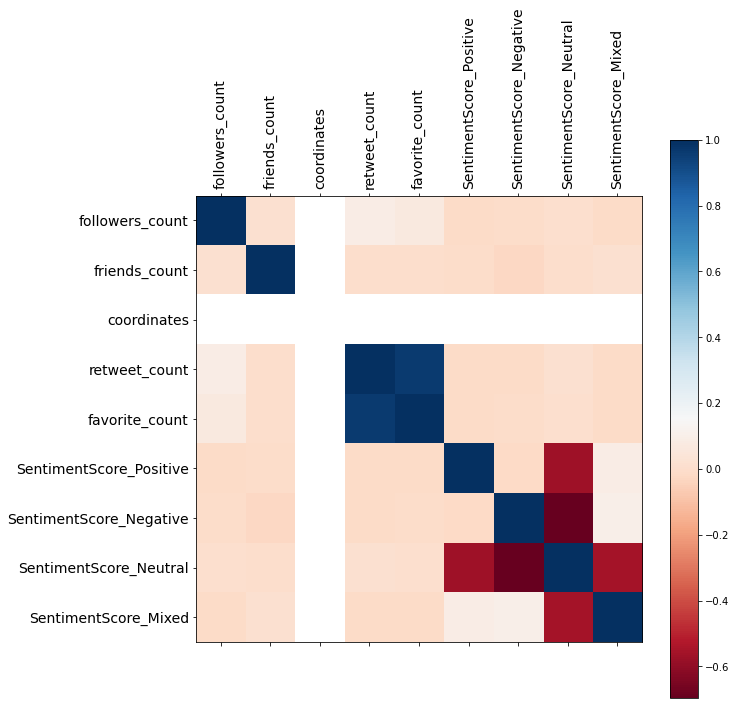

In [38]:
#Let's plot a correlation figure
fig = plt.figure(figsize=(10,10))
plt.matshow(corr,cmap='RdBu',fignum=fig.number)
plt.colorbar()
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical', fontsize=14);
plt.yticks(range(len(corr.columns)),corr.columns, fontsize=14);

### Insights
We can identify when there is a huge increase in the retweets and favorites count the neutral score will be more positive. Also, when the friends count increases, the mixed sentiment scores will be more positively correlated.

# 7. Sentiments Score Trend Analysis by Time, Retweets and Favorites Count

# Methods and objectives
This analysis uses pandas and plotly libraries. The dataset is reshaped with Pandas, the average scores are calculated with the.mean() function. The scatter plots are plotted with the plotly library. <br> <br> 
Objective: To identify the trends or occupancy of the sentiment scores by Time, Retweets, and Favorites count. 

In [39]:
SentimentScore_Positive_by_date = tweet_df.groupby('date').mean()['SentimentScore_Positive'].reset_index()
SentimentScore_Negative_by_date = tweet_df.groupby('date').mean()['SentimentScore_Negative'].reset_index()
SentimentScore_Neutral_by_date = tweet_df.groupby('date').mean()['SentimentScore_Neutral'].reset_index()
SentimentScore_Mixed_by_date = tweet_df.groupby('date').mean()['SentimentScore_Mixed'].reset_index()

In [40]:
top10positive = SentimentScore_Positive_by_date.sort_values('SentimentScore_Positive',ascending=0).head(10)
top10positive

date  SentimentScore_Positive
719   2022-02-22 10:53:37+00:00                 0.996263
2452  2022-02-22 11:51:05+00:00                 0.995342
1667  2022-02-22 11:24:45+00:00                 0.992300
48    2022-02-22 10:29:44+00:00                 0.978629
79    2022-02-22 10:30:37+00:00                 0.968057
217   2022-02-22 10:35:19+00:00                 0.967188
284   2022-02-22 10:38:08+00:00                 0.937121
1586  2022-02-22 11:22:01+00:00                 0.931993
1473  2022-02-22 11:17:42+00:00                 0.927233
2236  2022-02-22 11:43:46+00:00                 0.924746

In [41]:
top10negative = SentimentScore_Negative_by_date.sort_values('SentimentScore_Negative',ascending=0).head(10)
top10negative

date  SentimentScore_Negative
1961  2022-02-22 11:34:21+00:00                 0.985341
400   2022-02-22 10:42:27+00:00                 0.980393
1595  2022-02-22 11:22:17+00:00                 0.969666
2763  2022-02-22 12:01:27+00:00                 0.915479
1662  2022-02-22 11:24:35+00:00                 0.913612
1626  2022-02-22 11:23:14+00:00                 0.909454
2754  2022-02-22 12:01:14+00:00                 0.908822
2140  2022-02-22 11:40:10+00:00                 0.905784
2780  2022-02-22 12:01:57+00:00                 0.901380
1153  2022-02-22 11:07:12+00:00                 0.896975

In [42]:
top10neutral = SentimentScore_Neutral_by_date.sort_values('SentimentScore_Neutral',ascending=0).head(10)
top10neutral

date  SentimentScore_Neutral
1946  2022-02-22 11:33:57+00:00                0.999599
351   2022-02-22 10:40:40+00:00                0.999594
2578  2022-02-22 11:55:42+00:00                0.999585
1413  2022-02-22 11:15:38+00:00                0.999580
277   2022-02-22 10:37:56+00:00                0.999571
393   2022-02-22 10:42:14+00:00                0.999569
2212  2022-02-22 11:42:49+00:00                0.999561
10    2022-02-22 10:28:01+00:00                0.999559
1449  2022-02-22 11:16:57+00:00                0.999550
201   2022-02-22 10:34:36+00:00                0.999546

In [43]:
top10mixed = SentimentScore_Mixed_by_date.sort_values('SentimentScore_Mixed',ascending=0).head(10)
top10mixed

date  SentimentScore_Mixed
2237  2022-02-22 11:43:47+00:00              0.956861
1416  2022-02-22 11:15:46+00:00              0.942364
1920  2022-02-22 11:33:05+00:00              0.882220
104   2022-02-22 10:31:38+00:00              0.871897
1249  2022-02-22 11:10:16+00:00              0.853191
1987  2022-02-22 11:35:08+00:00              0.835652
1769  2022-02-22 11:28:33+00:00              0.823624
319   2022-02-22 10:39:34+00:00              0.815435
2292  2022-02-22 11:45:25+00:00              0.783056
1224  2022-02-22 11:09:34+00:00              0.763101

The plots are represented using go.scatter() function. The graph displays the highest average scores across the time period. <br>The plot dispalys the highest average sentiment scores for each sentiment type. <br>
X-axis shows the date and Y-Axis shows the sentiments score.

In [44]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=top10positive['date']
                         , y =top10positive['SentimentScore_Positive']
                         , mode = 'lines + markers', name='SentimentScore_Positive', line = dict(color="Green", width = 2)))
fig.add_trace(go.Scatter(x=top10negative['date']
                         , y =top10negative['SentimentScore_Negative']
                         , mode = 'lines + markers', name='SentimentScore_Negative', line = dict(color="Red", width = 2)))
fig.add_trace(go.Scatter(x=top10neutral['date']
                         , y =top10neutral['SentimentScore_Neutral']
                         , mode = 'lines + markers', name='SentimentScore_Neutral', line = dict(color="Blue", width = 2)))
fig.add_trace(go.Scatter(x=top10mixed['date']
                         , y =top10mixed['SentimentScore_Mixed']
                         , mode = 'lines + markers', name='SentimentScore_Mixed', line = dict(color="Orange", width = 2)))
fig.update_layout(title='Highest Average Sentiments Scores',xaxis_tickfont_size = 16,yaxis_tickfont_size = 16,  yaxis = dict(title='Sentiment score'), 
                         xaxis = dict(title='Date & Time'))
fig.show()

### Insights
The top 10 highest average sentiment score within the time duration taken to scrap the data, shows that the neutral sentiment is scattered more with high sentiment score when compared to other types.

# Overall Sentiment Score by Retweet Counts

X-Axis shows the retweet count <br>
Y-Axis shows the sentiment scores

In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tweet_df['retweet_count']
                         , y =tweet_df['SentimentScore_Positive']
                         , mode = 'lines + markers', name='SentimentScore_Positive', line = dict(color="Green", width = 2)))
fig.add_trace(go.Scatter(x=tweet_df['retweet_count']
                         , y =tweet_df['SentimentScore_Negative']
                         , mode = 'lines + markers', name='SentimentScore_Negative', line = dict(color="Red", width = 2)))
fig.add_trace(go.Scatter(x=tweet_df['retweet_count']
                         , y =tweet_df['SentimentScore_Neutral']
                         , mode = 'lines + markers', name='SentimentScore_Neutral', line = dict(color="Blue", width = 2)))
fig.add_trace(go.Scatter(x=tweet_df['retweet_count']
                         , y =tweet_df['SentimentScore_Mixed']
                         , mode = 'lines + markers', name='SentimentScore_Mixed', line = dict(color="Orange", width = 2)))
fig.update_layout(xaxis_tickfont_size = 16, xaxis = dict(title='Retweets Count'), yaxis_tickfont_size = 16,
                          yaxis = dict(title='Sentiment Score'))
fig.show()

# Overall Sentiment Score by Favorites Count

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tweet_df['favorite_count']
                         , y =tweet_df['SentimentScore_Positive']
                         , mode = 'lines + markers', name='SentimentScore_Positive', line = dict(color="Green", width = 2)))
fig.add_trace(go.Scatter(x=tweet_df['favorite_count']
                         , y =tweet_df['SentimentScore_Negative']
                         , mode = 'lines + markers', name='SentimentScore_Negative', line = dict(color="Red", width = 2)))
fig.add_trace(go.Scatter(x=tweet_df['favorite_count']
                         , y =tweet_df['SentimentScore_Neutral']
                         , mode = 'lines + markers', name='SentimentScore_Neutral', line = dict(color="Blue", width = 2)))
fig.add_trace(go.Scatter(x=tweet_df['favorite_count']
                         , y =tweet_df['SentimentScore_Mixed']
                         , mode = 'lines + markers', name='SentimentScore_Mixed', line = dict(color="Orange", width = 2)))
fig.update_layout(xaxis_tickfont_size = 16, yaxis = dict(title='Sentiment Score'),yaxis_tickfont_size = 16,
                          xaxis = dict(title='Favorites Count') )
fig.show()

### Insights

The neutral sentiment score is high or increasing with respect to the retweets count, while the positive, negative, and mixed sentiment types are less or decreasing.<br>
The neutral sentiment score is high or increasing with respect to the favourites count, while the positive, negative, and mixed sentiment types are less or decreasing.

# 8. Predictive Analysis for Sentiment Scores by Retweet and Favorites counts

# Methods and objectives
Seaborn library is used to plot the regression plots. <br><br>
Objective: To find out  how the sentiment scores will be affected in the future with the increase in retweets and favorite counts

### 8.1. Retweet - Positive, Negative, Neutral & Mixed

[Text(0.5, 1.0, 'Effect of retweet_count on SentimentScore_Negative')]

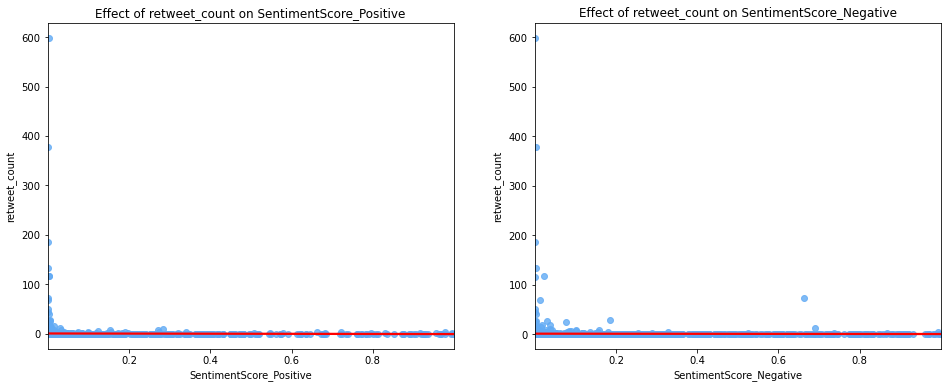

In [47]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(16,6))

sns.regplot(x='SentimentScore_Positive',y='retweet_count', data =tweet_df, ax=axes[0], line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of retweet_count on SentimentScore_Positive')

sns.regplot(x='SentimentScore_Negative',y='retweet_count', data =tweet_df, ax=axes[1], line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of retweet_count on SentimentScore_Negative')

[Text(0.5, 1.0, 'Effect of retweet_count on SentimentScore_Mixed')]

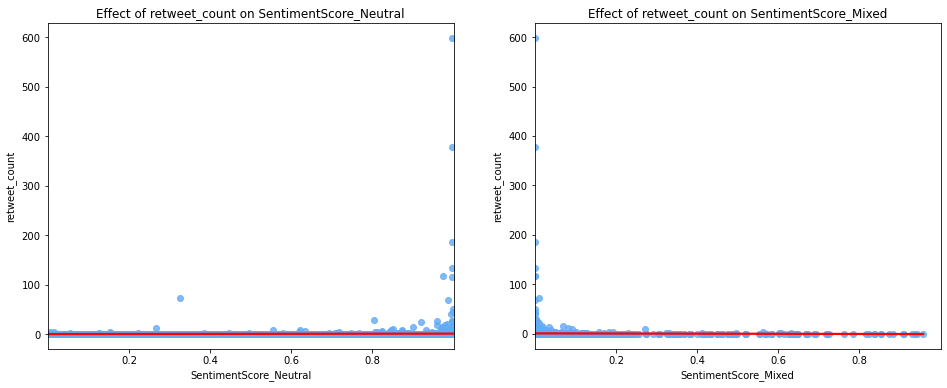

In [48]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(16,6))
sns.regplot(x='SentimentScore_Neutral',y='retweet_count', data =tweet_df, ax=axes[0],  line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of retweet_count on SentimentScore_Neutral')

sns.regplot(x='SentimentScore_Mixed',y='retweet_count', data =tweet_df, ax=axes[1], line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of retweet_count on SentimentScore_Mixed')


### 8.2. Favourite - Positive, Negative, Neutral & Mixed

[Text(0.5, 1.0, 'Effect of favorite_count on SentimentScore_Negative')]

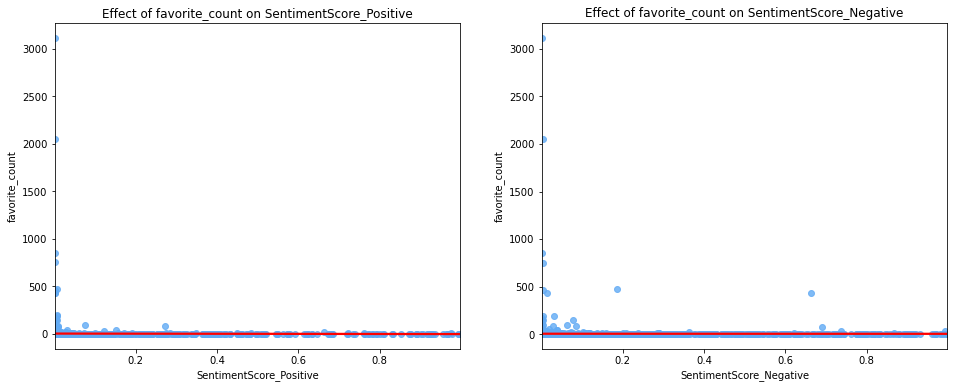

In [49]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(16,6))

sns.regplot(x='SentimentScore_Positive',y='favorite_count', data =tweet_df, ax=axes[0], line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of favorite_count on SentimentScore_Positive')

sns.regplot(x='SentimentScore_Negative',y='favorite_count', data =tweet_df, ax=axes[1], line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of favorite_count on SentimentScore_Negative')

[Text(0.5, 1.0, 'Effect of favorite_count on SentimentScore_Mixed')]

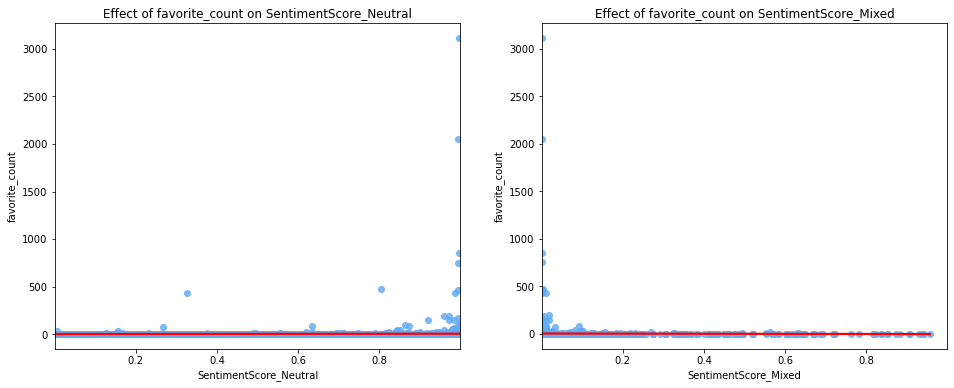

In [50]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(16,6))

sns.regplot(x='SentimentScore_Neutral',y='favorite_count', data =tweet_df, ax=axes[0], line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of favorite_count on SentimentScore_Neutral')

sns.regplot(x='SentimentScore_Mixed',y='favorite_count', data =tweet_df, ax=axes[1], line_kws={'color':'red'},
                scatter_kws={'color':'#61AAF4'},ci=None).set(title='Effect of favorite_count on SentimentScore_Mixed')

### Insights

There is no increase in the sentiment scores with the increase of retweet and favourite counts except neutral sentiments. Neutral sentiment scores increase with respect to retweets and favourite counts. 